TEST: LOSS 0.1827 | mIOU 0.7118
Average Inference Time : 0.033419372124986337


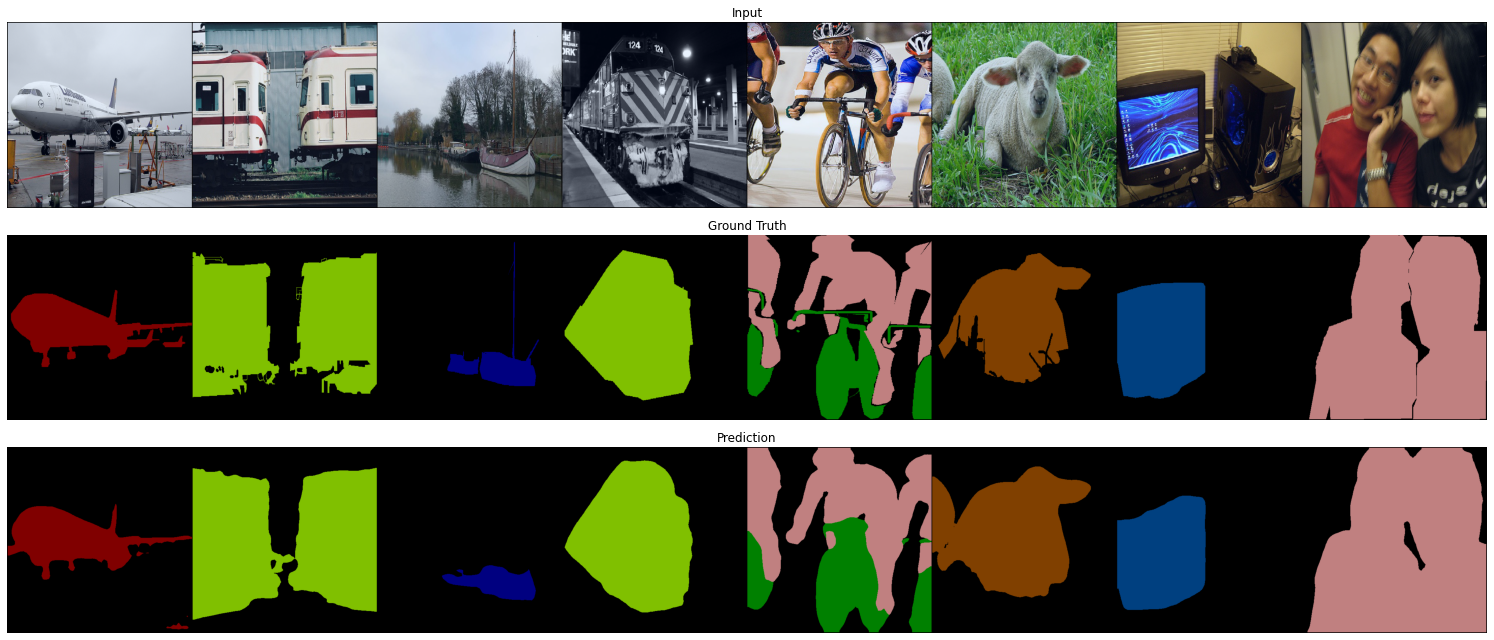

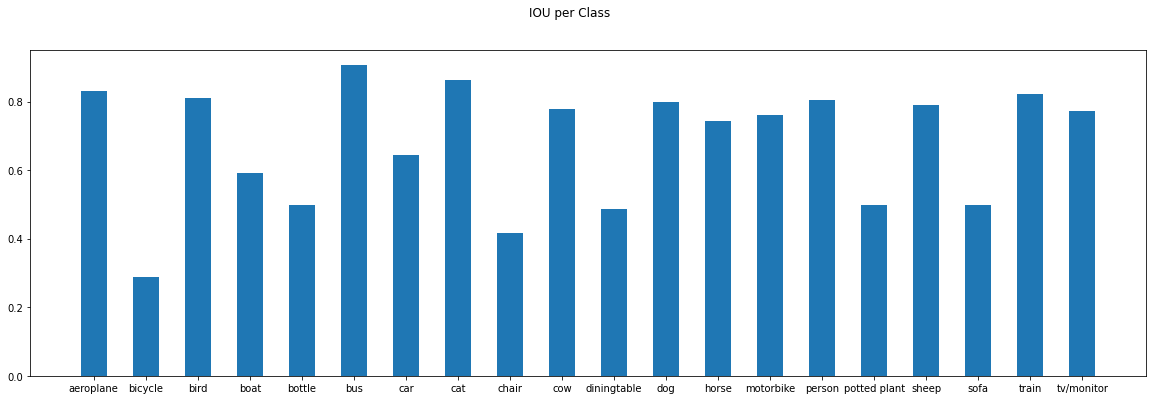

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np
import argparse
from time import time
from torchsummary import summary

import torch
from torch.utils.data import DataLoader
from torchvision.models.segmentation import deeplabv3_resnet50,deeplabv3_resnet101

from utils.Util import make_figure,make_iou_bar
from utils.Dataset import get_dataset
from utils.Transform import get_transform
from utils.Metric import intersection_union

# parser = argparse.ArgumentParser()
# parser.add_argument('--backbone',choices=['resnet50','resnet101'],required=True)
# args = vars(parser.parse_args())
# args = parser.parse_args()

def get_model(backbone:str):
    if backbone == 'resnet50':
        model = deeplabv3_resnet50(pretrained=True)
    elif backbone == 'resnet101':
        model = deeplabv3_resnet101(pretrained=True)
    return model

batch_size = 8
root_dir = os.getcwd()
data_dir = os.path.join(os.path.dirname(root_dir),"dataset","VOCdevkit","VOC2012")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_ds,num_classes = get_dataset(data_dir,'voc',"val",transform=get_transform(train=False,base_size=512))
data_loader = DataLoader(test_ds,batch_size=8,shuffle=False)
colormap = test_ds.colormap
classes = test_ds.classes

model = get_model('resnet50').to(device)
criterion = torch.nn.CrossEntropyLoss(ignore_index=255)

model.eval()
loss_arr=[]
total_intersection = np.zeros((num_classes,))
total_union = np.zeros((num_classes,))
time_arr=[]
with torch.no_grad():
    for data in data_loader:
        start = time()
        inputs, targets = data['input'].to(device), data['target'].to(device)
        # Forward
        outputs = model(inputs)['out']
        # Metric
        loss = criterion(outputs,targets.long())
        loss_arr.append(loss.item())
        intersection, union = intersection_union(outputs,targets,num_classes)
        total_intersection += intersection
        total_union += union
        time_arr.append(time()-start)

loss_mean = np.mean(loss_arr)
iou = total_intersection / total_union
miou = np.nanmean(total_intersection[1:]) / np.nanmean(total_union[1:])
print(f"TEST: LOSS {loss_mean:.4f} | mIOU {miou:.4f}")
print(f"Average Inference Time : {np.mean(time_arr)/batch_size}")
data = next(iter(data_loader))
inputs, targets = data['input'].to(device), data['target'].to(device)
outputs = model(inputs)['out']
fig = make_figure(inputs.detach().cpu(),targets.detach().cpu(),outputs.detach().cpu(),colormap)
iou_bar = make_iou_bar(np.nan_to_num(iou[1:]),classes[1:])
plt.show()

TEST: LOSS 0.2295 | mIOU 0.6618
Average Inference Time : 0.009172380134299562


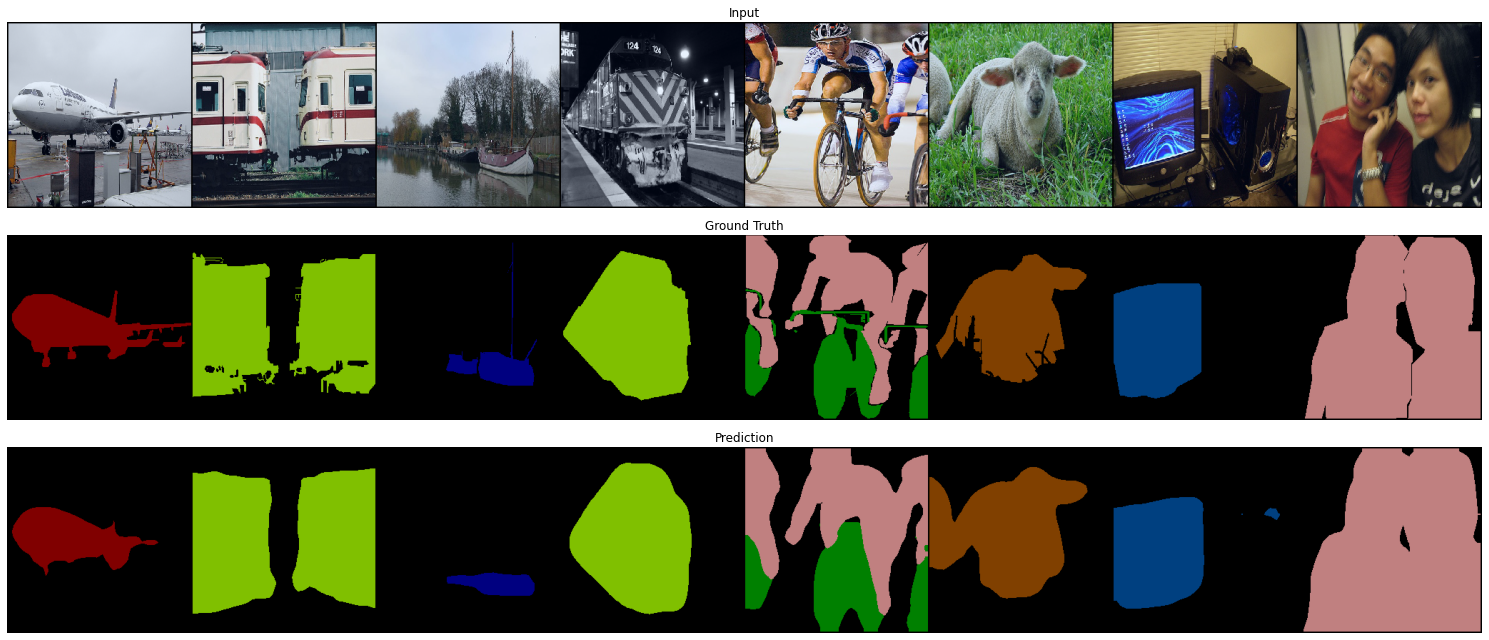

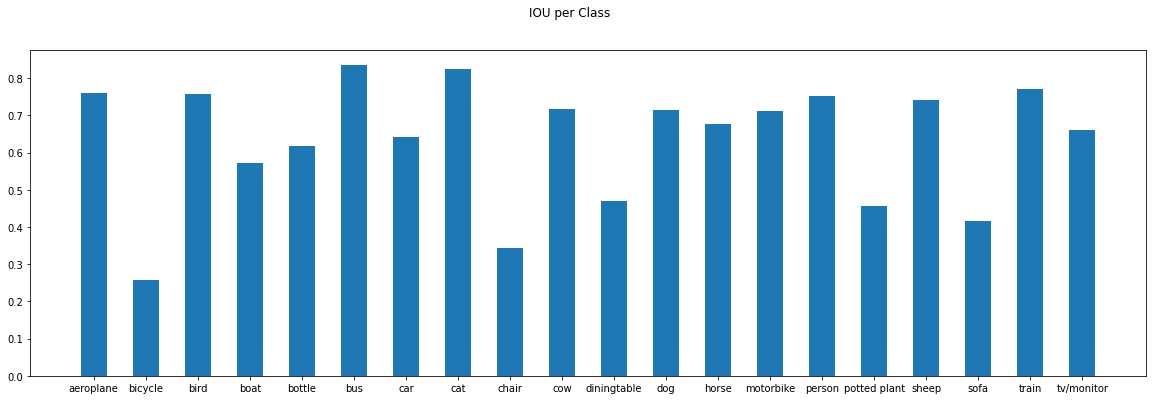

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
import argparse
from time import time
from torchsummary import summary

import torch
from torch.utils.data import DataLoader
from torchvision.models.segmentation import deeplabv3_resnet50,deeplabv3_resnet101

from utils.Util import make_figure,make_iou_bar
from utils.Dataset import get_dataset
from utils.Transform import get_transform
from utils.Metric import intersection_union

# parser = argparse.ArgumentParser()
# parser.add_argument('--backbone',choices=['resnet50','resnet101'],required=True)
# args = vars(parser.parse_args())
# args = parser.parse_args()

def get_model(backbone:str):
    if backbone == 'resnet50':
        model = deeplabv3_resnet50(pretrained=True)
    elif backbone == 'resnet101':
        model = deeplabv3_resnet101(pretrained=True)
    return model

root_dir = os.getcwd()
data_dir = os.path.join(os.path.dirname(root_dir),"dataset","VOCdevkit","VOC2012")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_ds,num_classes = get_dataset(data_dir,'voc',"val",transform=get_transform(train=False,base_size=256))
data_loader = DataLoader(test_ds,batch_size=8,shuffle=False)
colormap = test_ds.colormap
classes = test_ds.classes

model = get_model('resnet50').to(device)
criterion = torch.nn.CrossEntropyLoss(ignore_index=255)

model.eval()
loss_arr=[]
total_intersection = np.zeros((num_classes,))
total_union = np.zeros((num_classes,))
time_arr=[]
with torch.no_grad():
    for data in data_loader:
        start = time()
        inputs, targets = data['input'].to(device), data['target'].to(device)
        # Forward
        outputs = model(inputs)['out']
        # Metric
        loss = criterion(outputs,targets.long())
        loss_arr.append(loss.item())
        intersection, union = intersection_union(outputs,targets,num_classes)
        total_intersection += intersection
        total_union += union
        time_arr.append(time()-start)

loss_mean = np.mean(loss_arr)
iou = total_intersection / total_union
miou = np.nanmean(total_intersection[1:]) / np.nanmean(total_union[1:])
print(f"TEST: LOSS {loss_mean:.4f} | mIOU {miou:.4f}")
print(f"Average Inference Time : {np.mean(time_arr)/batch_size}")
data = next(iter(data_loader))
inputs, targets = data['input'].to(device), data['target'].to(device)
outputs = model(inputs)['out']
fig = make_figure(inputs.detach().cpu(),targets.detach().cpu(),outputs.detach().cpu(),colormap)
iou_bar = make_iou_bar(np.nan_to_num(iou[1:]),classes[1:])
plt.show()

TEST: LOSS 0.1762 | mIOU 0.7293
Average Inference Time : 0.049632920013679256


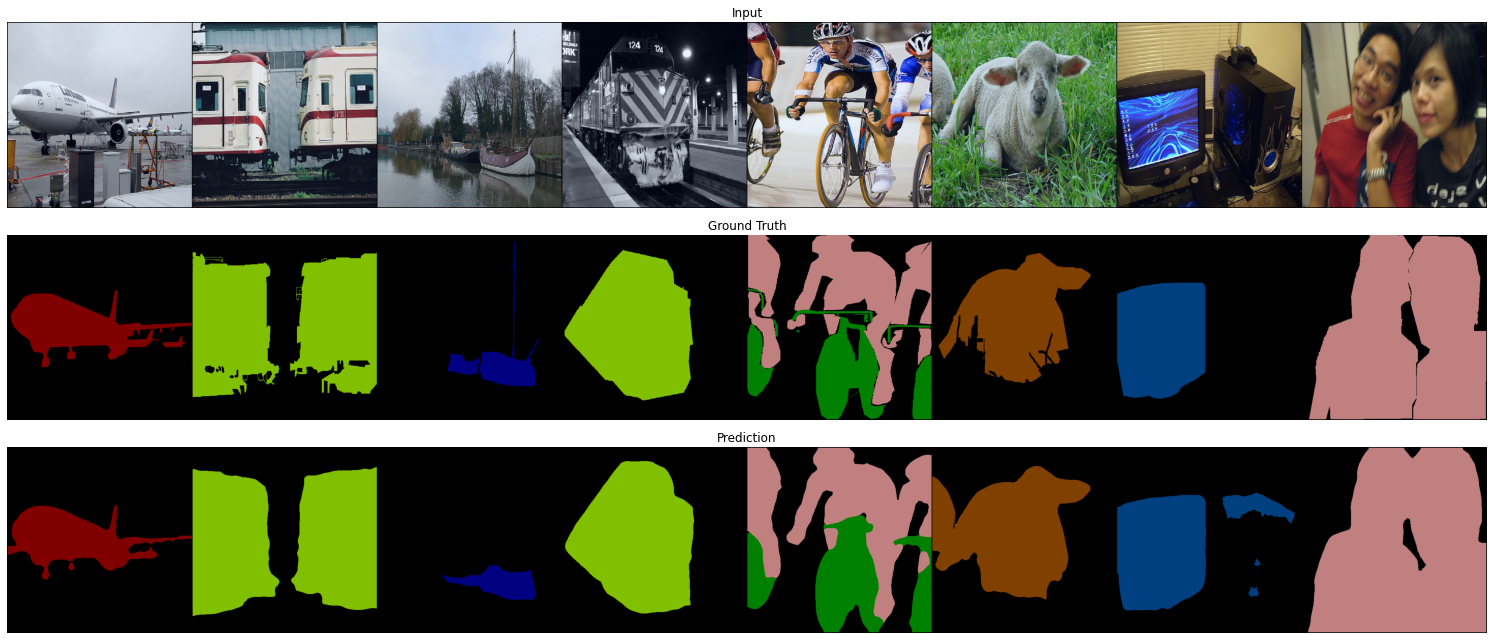

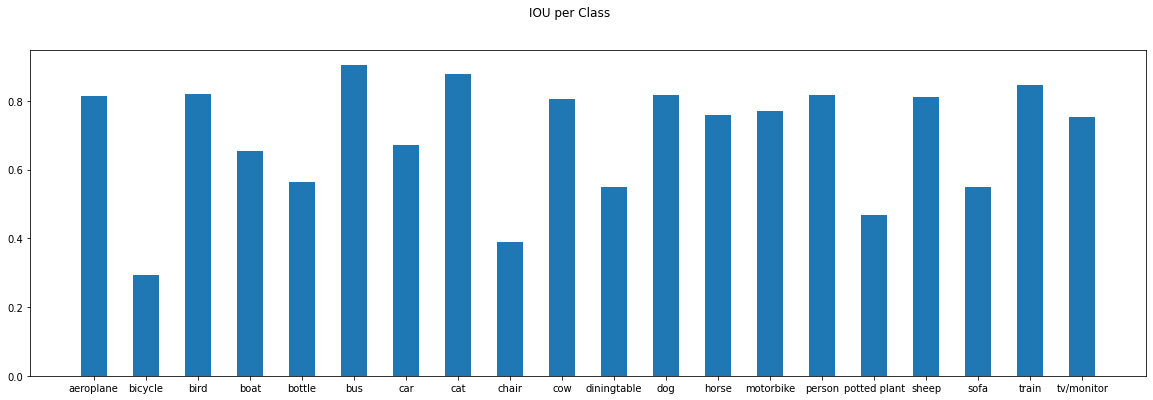

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
import argparse
from time import time
from torchsummary import summary

import torch
from torch.utils.data import DataLoader
from torchvision.models.segmentation import deeplabv3_resnet50,deeplabv3_resnet101

from utils.Util import make_figure,make_iou_bar
from utils.Dataset import get_dataset
from utils.Transform import get_transform
from utils.Metric import intersection_union

# parser = argparse.ArgumentParser()
# parser.add_argument('--backbone',choices=['resnet50','resnet101'],required=True)
# args = vars(parser.parse_args())
# args = parser.parse_args()

def get_model(backbone:str):
    if backbone == 'resnet50':
        model = deeplabv3_resnet50(pretrained=True)
    elif backbone == 'resnet101':
        model = deeplabv3_resnet101(pretrained=True)
    return model

root_dir = os.getcwd()
data_dir = os.path.join(os.path.dirname(root_dir),"dataset","VOCdevkit","VOC2012")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_ds,num_classes = get_dataset(data_dir,'voc',"val",transform=get_transform(train=False,base_size=512))
data_loader = DataLoader(test_ds,batch_size=8,shuffle=False)
colormap = test_ds.colormap
classes = test_ds.classes

model = get_model('resnet101').to(device)
criterion = torch.nn.CrossEntropyLoss(ignore_index=255)

model.eval()
loss_arr=[]
total_intersection = np.zeros((num_classes,))
total_union = np.zeros((num_classes,))
time_arr=[]
with torch.no_grad():
    for data in data_loader:
        start = time()
        inputs, targets = data['input'].to(device), data['target'].to(device)
        # Forward
        outputs = model(inputs)['out']
        # Metric
        loss = criterion(outputs,targets.long())
        loss_arr.append(loss.item())
        intersection, union = intersection_union(outputs,targets,num_classes)
        total_intersection += intersection
        total_union += union
        time_arr.append(time()-start)

loss_mean = np.mean(loss_arr)
iou = total_intersection / total_union
miou = np.nanmean(total_intersection[1:]) / np.nanmean(total_union[1:])
print(f"TEST: LOSS {loss_mean:.4f} | mIOU {miou:.4f}")
print(f"Average Inference Time : {np.mean(time_arr)/batch_size}")
data = next(iter(data_loader))
inputs, targets = data['input'].to(device), data['target'].to(device)
outputs = model(inputs)['out']
fig = make_figure(inputs.detach().cpu(),targets.detach().cpu(),outputs.detach().cpu(),colormap)
iou_bar = make_iou_bar(np.nan_to_num(iou[1:]),classes[1:])
plt.show()

TEST: LOSS 0.2193 | mIOU 0.6738
Average Inference Time : 0.013474853484185187


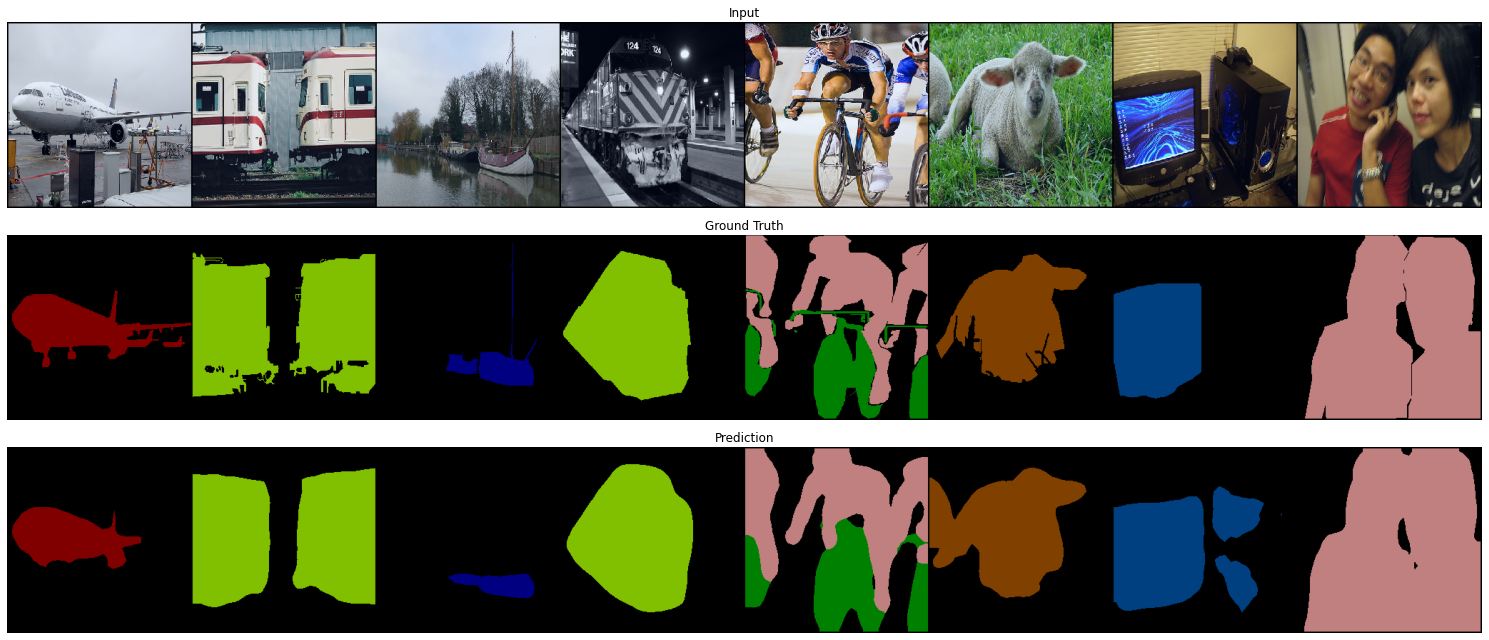

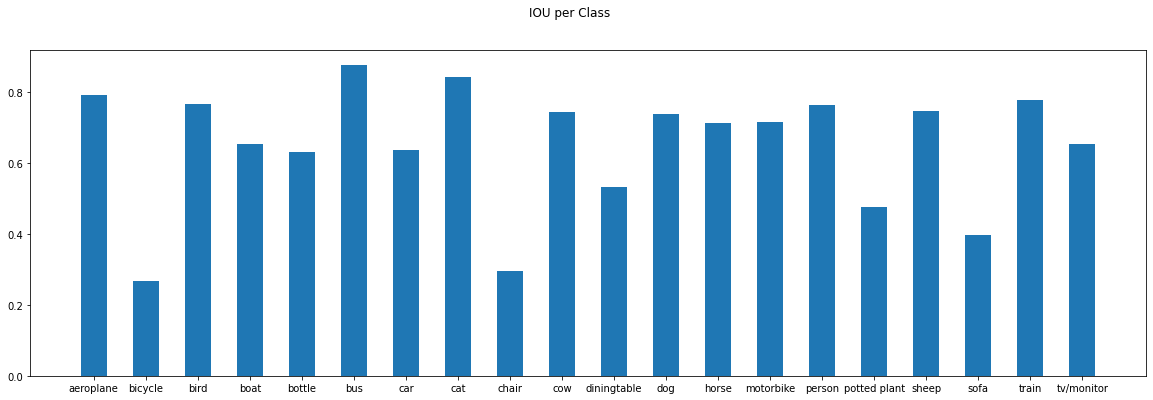

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np
import argparse
from time import time
from torchsummary import summary

import torch
from torch.utils.data import DataLoader
from torchvision.models.segmentation import deeplabv3_resnet50,deeplabv3_resnet101

from utils.Util import make_figure,make_iou_bar
from utils.Dataset import get_dataset
from utils.Transform import get_transform
from utils.Metric import intersection_union

# parser = argparse.ArgumentParser()
# parser.add_argument('--backbone',choices=['resnet50','resnet101'],required=True)
# args = vars(parser.parse_args())
# args = parser.parse_args()

def get_model(backbone:str):
    if backbone == 'resnet50':
        model = deeplabv3_resnet50(pretrained=True)
    elif backbone == 'resnet101':
        model = deeplabv3_resnet101(pretrained=True)
    return model

root_dir = os.getcwd()
data_dir = os.path.join(os.path.dirname(root_dir),"dataset","VOCdevkit","VOC2012")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
test_ds,num_classes = get_dataset(data_dir,'voc',"val",transform=get_transform(train=False,base_size=256))
data_loader = DataLoader(test_ds,batch_size=8,shuffle=False)
colormap = test_ds.colormap
classes = test_ds.classes


model = get_model('resnet101').to(device)
criterion = torch.nn.CrossEntropyLoss(ignore_index=255)

model.eval()
loss_arr=[]
total_intersection = np.zeros((num_classes,))
total_union = np.zeros((num_classes,))
time_arr=[]
with torch.no_grad():
    for data in data_loader:
        start = time()
        inputs, targets = data['input'].to(device), data['target'].to(device)
        # Forward
        outputs = model(inputs)['out']
        # Metric
        loss = criterion(outputs,targets.long())
        loss_arr.append(loss.item())
        intersection, union = intersection_union(outputs,targets,num_classes)
        total_intersection += intersection
        total_union += union
        time_arr.append(time()-start)

loss_mean = np.mean(loss_arr)
iou = total_intersection / total_union
miou = np.nanmean(total_intersection[1:]) / np.nanmean(total_union[1:])
print(f"TEST: LOSS {loss_mean:.4f} | mIOU {miou:.4f}")
print(f"Average Inference Time : {np.mean(time_arr)/batch_size}")
data = next(iter(data_loader))
inputs, targets = data['input'].to(device), data['target'].to(device)
outputs = model(inputs)['out']
fig = make_figure(inputs.detach().cpu(),targets.detach().cpu(),outputs.detach().cpu(),colormap)
iou_bar = make_iou_bar(np.nan_to_num(iou[1:]),classes[1:])
plt.show()

In [ ]:
import torch
import torchvision
from torchsummary import summary
backbone = torchvision.models.resnet50(pretrained=True)
summary(backbone,torch.rand(1,3,512,512))

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 256, 256]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 256, 256]        128
├─ReLU: 1-3                              [-1, 64, 256, 256]        --
├─MaxPool2d: 1-4                         [-1, 64, 128, 128]        --
├─Sequential: 1-5                        [-1, 256, 128, 128]       --
|    └─Bottleneck: 2-1                   [-1, 256, 128, 128]       --
|    |    └─Conv2d: 3-1                  [-1, 64, 128, 128]        4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 128, 128]        128
|    |    └─ReLU: 3-3                    [-1, 64, 128, 128]        --
|    |    └─Conv2d: 3-4                  [-1, 64, 128, 128]        36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 128, 128]        128
|    |    └─ReLU: 3-6                    [-1, 64, 128, 128]        --
|    |    └─Conv2d: 3-7                  [-1, 256, 128, 128]       16,38

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 256, 256]        9,408
├─BatchNorm2d: 1-2                       [-1, 64, 256, 256]        128
├─ReLU: 1-3                              [-1, 64, 256, 256]        --
├─MaxPool2d: 1-4                         [-1, 64, 128, 128]        --
├─Sequential: 1-5                        [-1, 256, 128, 128]       --
|    └─Bottleneck: 2-1                   [-1, 256, 128, 128]       --
|    |    └─Conv2d: 3-1                  [-1, 64, 128, 128]        4,096
|    |    └─BatchNorm2d: 3-2             [-1, 64, 128, 128]        128
|    |    └─ReLU: 3-3                    [-1, 64, 128, 128]        --
|    |    └─Conv2d: 3-4                  [-1, 64, 128, 128]        36,864
|    |    └─BatchNorm2d: 3-5             [-1, 64, 128, 128]        128
|    |    └─ReLU: 3-6                    [-1, 64, 128, 128]        --
|    |    └─Conv2d: 3-7                  [-1, 256, 128, 128]       16,38